In [2]:
from music21 import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
# Library good for displaying music and audio
import librosa.display
import mir_eval.display
import pickle
import json
import seaborn as sns
from tqdm import tqdm
import pretty_midi as pm
from collections import defaultdict

In [3]:
mid_pretty = pm.PrettyMIDI('maestro_play.midi')

Text(0.5, 0, 'Time')

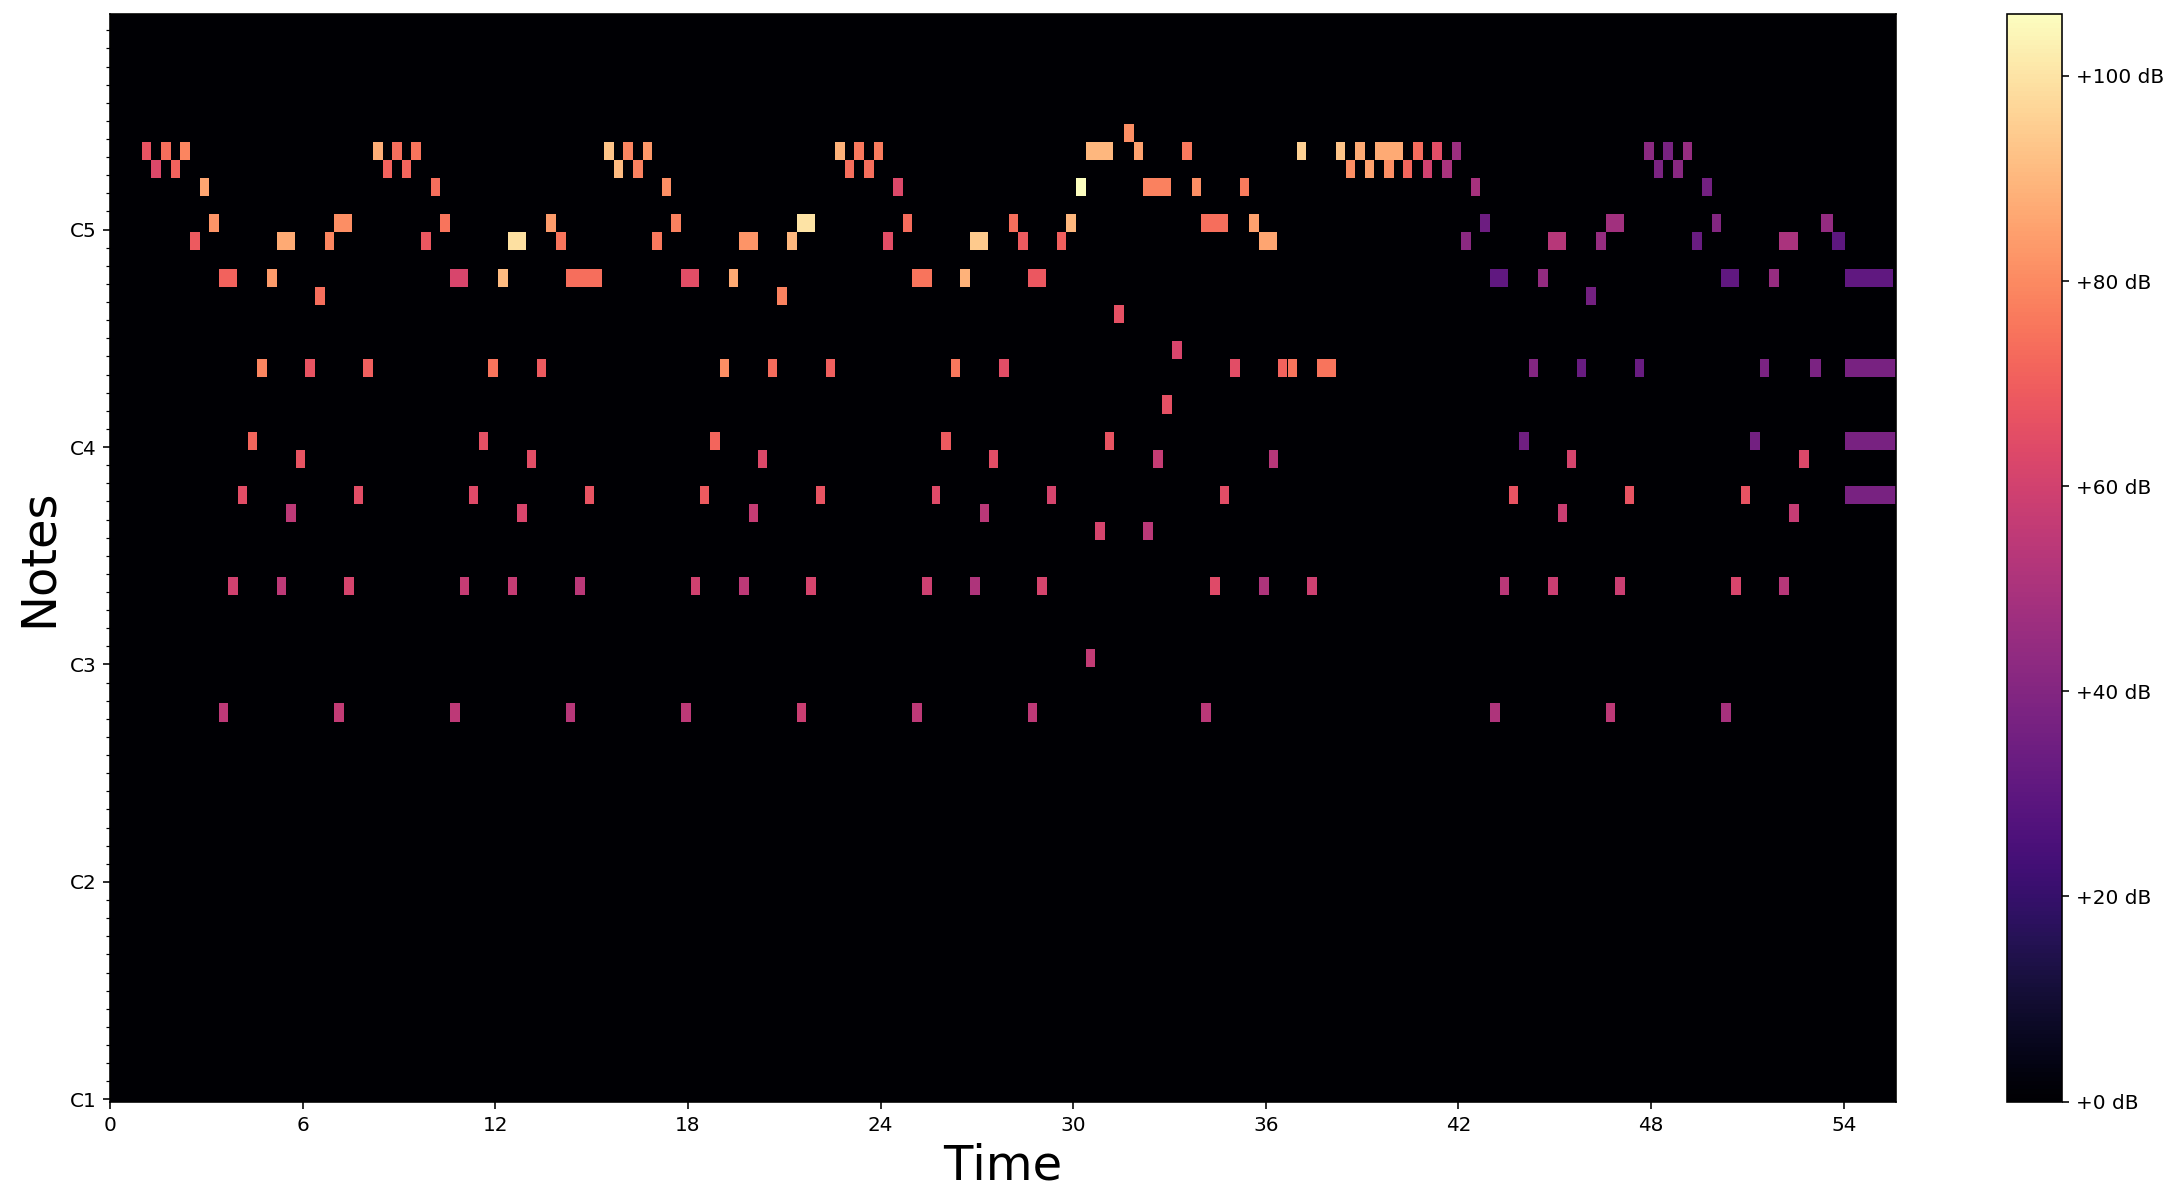

In [11]:
def plot_piano_roll(mid_pretty, start_pitch, end_pitch, fs=100):
    librosa.display.specshow(mid_pretty.get_piano_roll(fs)[start_pitch:end_pitch],
                             hop_length=1, sr=fs, x_axis='time', y_axis='cqt_note'),
                             #fmin=mid_pretty.note_number_to_hz(start_pitch))

plt.figure(figsize=(20, 10))
plot_piano_roll(mid_pretty, 24, 84)
plt.colorbar(format='%+2.0f dB')
plt.ylabel('Notes', fontsize = 24)
plt.xlabel('Time', fontsize = 24)

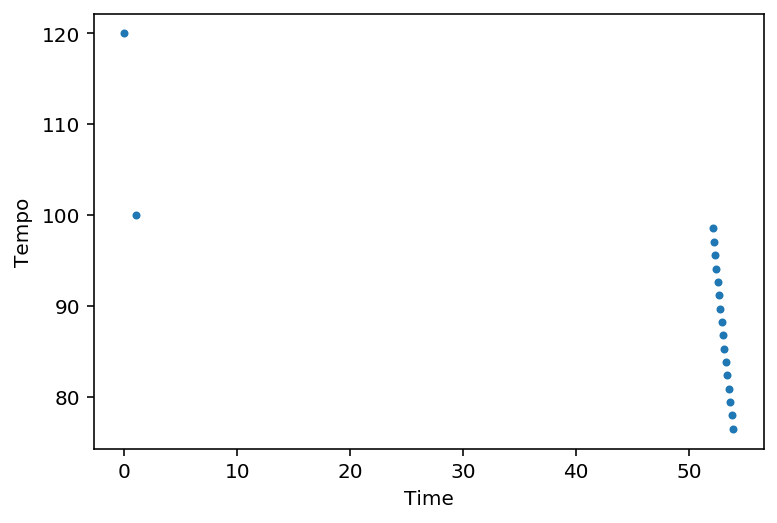

In [7]:
times, tempo_changes = mid_pretty.get_tempo_changes()
plt.plot(times, tempo_changes, '.')
plt.xlabel('Time')
plt.ylabel('Tempo');

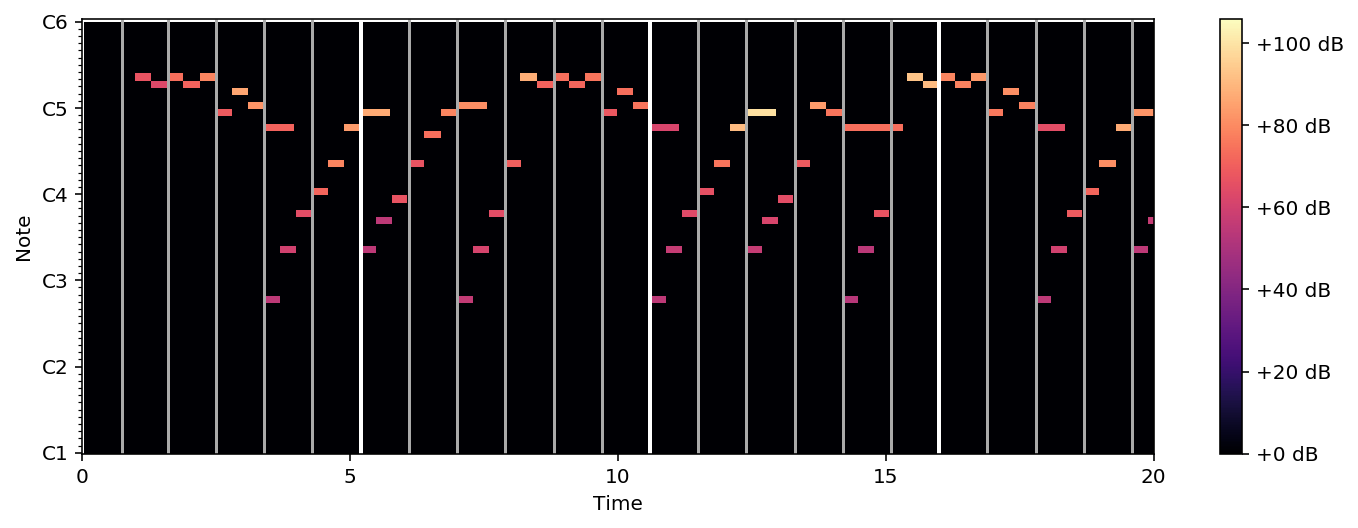

In [12]:
beats = mid_pretty.get_beats()
downbeats = mid_pretty.get_downbeats()
# Plot piano roll
plt.figure(figsize=(12, 4))
plot_piano_roll(mid_pretty, 24, 84)
ymin, ymax = plt.ylim()
# Plot beats as grey lines, downbeats as white lines
mir_eval.display.events(beats, base=ymin, height=ymax, color='#AAAAAA')
mir_eval.display.events(downbeats, base=ymin, height=ymax, color='#FFFFFF', lw=2)
# Only display 20 seconds for clarity
plt.xlim(0, 20);
plt.colorbar(format='%+2.0f dB')

Text(0, 0.5, 'Proportion')

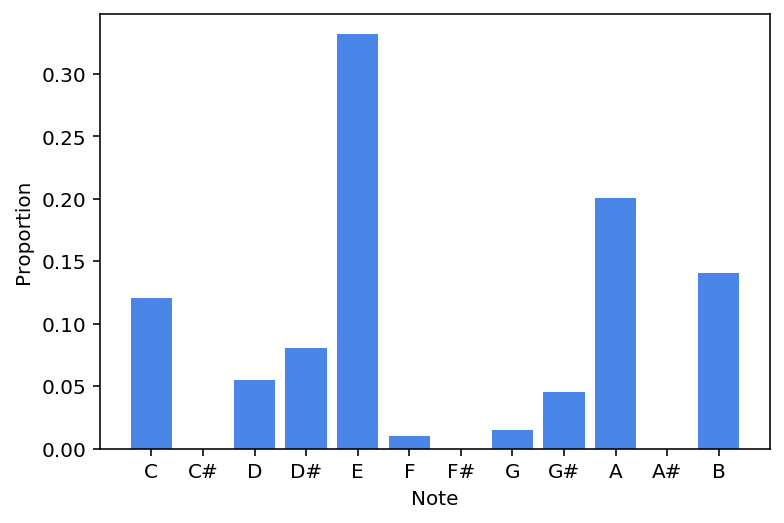

In [10]:
# Plot a pitch class distribution - sort of a proxy for key
plt.bar(np.arange(12), mid_pretty.get_pitch_class_histogram(), color = '#4a86e8');
plt.xticks(np.arange(12), ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'])
plt.xlabel('Note')
plt.ylabel('Proportion')

In [13]:
mid_pretty.estimate_tempo()

198.2369558198637